<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> EDA Mini Project <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##  Table of Content
**[Data Preprocessing:](#pre)**
1. [Import the necessary libraries and read the data]()
2. [Dropping unnecessary columns]()
3. [Conversion of columns]()
4. [Handling Missing Values]()

**[Exploratory Analysis:](#eda)**
1. [The distribution of Overall rating for all players]()
2. [Pair Plots]()
3. [Top 20 Players]()
4. [Top 5 Players in Each Position]()

**Performing DATA**

<table align="Center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>1. Import the necessary libraries and read the data.</b></i>
                </font>
            </div>
        </td>  
</table>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa = pd.read_csv("fifa.csv")
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df = pd.read_csv("fifa_+variable_information.csv",  encoding='latin-1')
df.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

**Looking at size of given dataset**

In [5]:
fifa.shape

(18207, 60)

**Looking at statistical details of given dataset**

In [6]:
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


**Looking at columns of the given dataset**

In [7]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

**Looking for isnull in given dataset**

In [8]:
fifa.isnull().apply(pd.value_counts)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
False,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,17966,18207.0,...,18159,18159,18159,18159,18159,18159,18159,18159,18159,16643
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,NaN,...,48,48,48,48,48,48,48,48,48,1564


In [9]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

**Looking for percentage of null values**

In [10]:
(fifa.isnull().apply(pd.value_counts)/len(fifa)) * 100

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
False,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,98.676333,100.0,...,99.736365,99.736365,99.736365,99.736365,99.736365,99.736365,99.736365,99.736365,99.736365,91.409897
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.323667,NaN,...,0.263635,0.263635,0.263635,0.263635,0.263635,0.263635,0.263635,0.263635,0.263635,8.590103


---

<table align="Center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>2.	Drop any columns that you deem unecessary for analysis</b></i>
                </font>
            </div>
        </td>  
</table>

In [11]:
#'Photo','Club Logo','Flag','Jersey Number' - these are columns cannot be used for analysis
#'Loaned From' has more 90% of null values. So it can also be dropped
fifa.drop(['Photo','Club Logo','Flag','Jersey Number', 'Body Type','Loaned From'],axis=1,inplace=True)

---

<table align="center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>3. Conversion of Columns into required forms </b></i>
                </font>
            </div>
        </td>  
</table>

In [12]:
# 1 Converting 'Value' to Float after getting rid of currency symbol and suffix.
for i in range(0,len(fifa)):
    if(fifa.loc[i,'Value'][-1:]=='M'):
        fifa.loc[i,'Value']=float(fifa.loc[i,'Value'][1:-1])*1000000
    elif(fifa.loc[i,'Value'][-1:]=='K'):
        fifa.loc[i,'Value']=float(fifa.loc[i,'Value'][1:-1])*1000
    elif(fifa.loc[i,'Value']=='€0'):
        fifa.loc[i,'Value']=0
fifa['Value']=pd.to_numeric(fifa['Value'])

In [13]:
#2 Convert 'Wage' to Float after getting rid of currency symbol and suffix.
for i in range(0,len(fifa)):
    if(type(fifa.loc[i,'Wage'])==float):
        fifa.loc[i,'Wage']=fifa.loc[i,'Wage']
    elif(type(fifa.loc[i,'Wage'])==int):
        fifa.loc[i,'Wage']=fifa.loc[i,'Wage']
    elif(fifa.loc[i,'Wage'][-1:]=='M'):
        fifa.loc[i,'Wage']=float(fifa.loc[i,'Wage'][1:-1])*1000000
    elif(fifa.loc[i,'Wage'][-1:]=='K'):
        fifa.loc[i,'Wage']=float(fifa.loc[i,'Wage'][1:-1])*1000
    elif(fifa.loc[i,'Wage']=='€0'):
        fifa.loc[i,'Wage']=0
fifa['Wage']=pd.to_numeric(fifa['Wage'])

In [14]:
# 3 Converting 'Joined' to int with only year
fifa['Joined']=pd.to_datetime(fifa['Joined'])
fifa['Joined'].isna().sum()
fifa['Joined'].fillna(fifa['Joined'].mode()[0],inplace=True)

for i in range(0,len(fifa)):
    fifa.loc[i,'Joined']=int(fifa.loc[i,'Joined'].strftime('%Y'))

fifa['Joined']=pd.to_numeric(fifa['Joined'])

In [15]:
# 4 Convering 'Height' to Float with decimal points in inches
for i in range(0,len(fifa)):
    if(type(fifa.loc[i,'Height'])is not float):
        x=fifa.loc[i,'Height'].split('\'')
        df.loc[i,'Height']=int(x[0])*12+int(x[1])

In [16]:
# 5 Removing the suffix and convert to float for 'Weight'
for i in range(0,len(fifa)):
    if(type(fifa.loc[i,'Weight'])is not float):
        fifa.loc[i,'Weight']=fifa.loc[i,'Weight'][0:-3]
        
fifa['Weight']=pd.to_numeric(fifa['Weight'])

In [17]:
#6 Converting 'Release Clause' to Float after getting rid of currency symbol and suffix.
for i in range(0,len(fifa)):
    if(type(fifa.loc[i,'Release Clause'])==float):
        fifa.loc[i,'Release Clause']=fifa.loc[i,'Release Clause']
    elif(fifa.loc[i,'Release Clause'][-1:]=='M'):
        fifa.loc[i,'Release Clause']=float(fifa.loc[i,'Release Clause'][1:-1])*1000000
    elif(fifa.loc[i,'Release Clause'][-1:]=='K'):
        fifa.loc[i,'Release Clause']=float(fifa.loc[i,'Release Clause'][1:-1])*1000
    elif(fifa.loc[i,'Release Clause']=='€0'):
        fifa.loc[i,'Release Clause']=0

fifa['Release Clause']=pd.to_numeric(fifa['Release Clause'])

In [18]:
fifa.head(10)[['Name','Value','Wage','Joined','Height','Weight','Release Clause']]

,Name,Value,Wage,Joined,Height,Weight,Release Clause
0,L. Messi,110500000.0,565000.0,2004,5'7,159.0,226500000.0
1,Cristiano Ronaldo,77000000.0,405000.0,2018,6'2,183.0,127100000.0
2,Neymar Jr,118500000.0,290000.0,2017,5'9,150.0,228100000.0
3,De Gea,72000000.0,260000.0,2011,6'4,168.0,138600000.0
4,K. De Bruyne,102000000.0,355000.0,2015,5'11,154.0,196400000.0
5,E. Hazard,93000000.0,340000.0,2012,5'8,163.0,172100000.0
6,L. Modrić,67000000.0,420000.0,2012,5'8,146.0,137400000.0
7,L. Suárez,80000000.0,455000.0,2014,6'0,190.0,164000000.0
8,Sergio Ramos,51000000.0,380000.0,2005,6'0,181.0,104600000.0
9,J. Oblak,68000000.0,94000.0,2014,6'2,192.0,144500000.0


<table align="center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>4. Check for missing values and do a mean imputation where necessary. </b></i>
                </font>
            </div>
        </td>  
</table>

In [19]:
fifa.isna().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Position                      60
Joined                         0
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpee

In [20]:
#It is found that 48 values are missing for many of the columns. 
#So dropping such rows reduces null values to a greater extent
fifa[fifa['Preferred Foot'].isna()][['Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties'
]].isna().sum()

Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
dtype: int64

In [21]:
fifa.dropna(subset=['Preferred Foot'],inplace=True)

In [22]:
# Filling missing values in 'Release Clause' column
fifa['Release Clause'].fillna(fifa['Release Clause'].mode()[0],inplace=True)

# Filling missing values in 'Contract Valid Until' column
fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mode()[0],inplace=True)

# Filling missing values in 'Club' column
j=0
for i in fifa[fifa['Club'].isna()].index:
    fifa.loc[i,'Club']=fifa['Club'].value_counts().index[j]
    j+=1

# Filling missing values in 'Position' column
fifa['Position']=fifa['Position'].fillna(fifa['Position'].mode()[0])

In [23]:
fifa.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

----

**Exploratory Analysis:**

<table align="center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>1.Plot the distribution of Overall rating for all players.  </b></i>
                </font>
            </div>
        </td>  
</table>

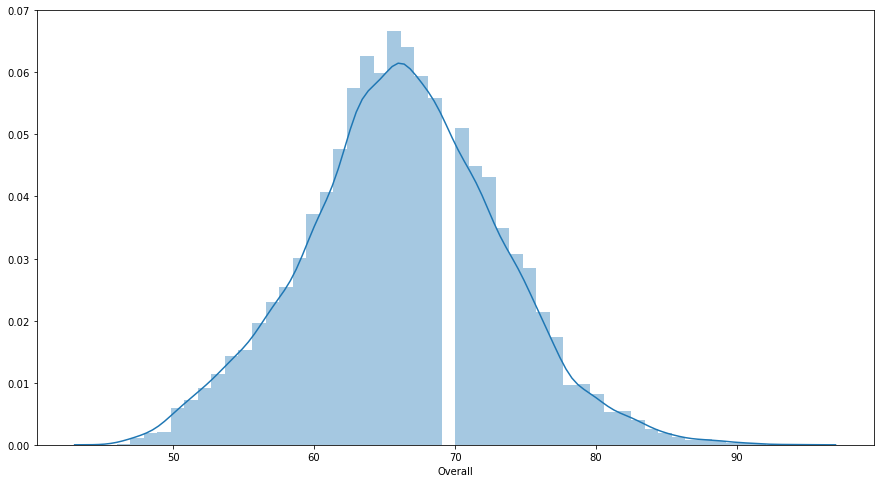

In [24]:
plt.figure(figsize=(15,8))
sns.distplot(a=fifa['Overall'])

In [27]:
fifa.loc[fifa['Overall'].idxmax()][0]

158023

In [30]:
fifa.loc[fifa['Value'].idxmax()][0]

190871

------

<table align="center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>2. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause.  </b></i>
                </font>
            </div>
        </td>  
</table>

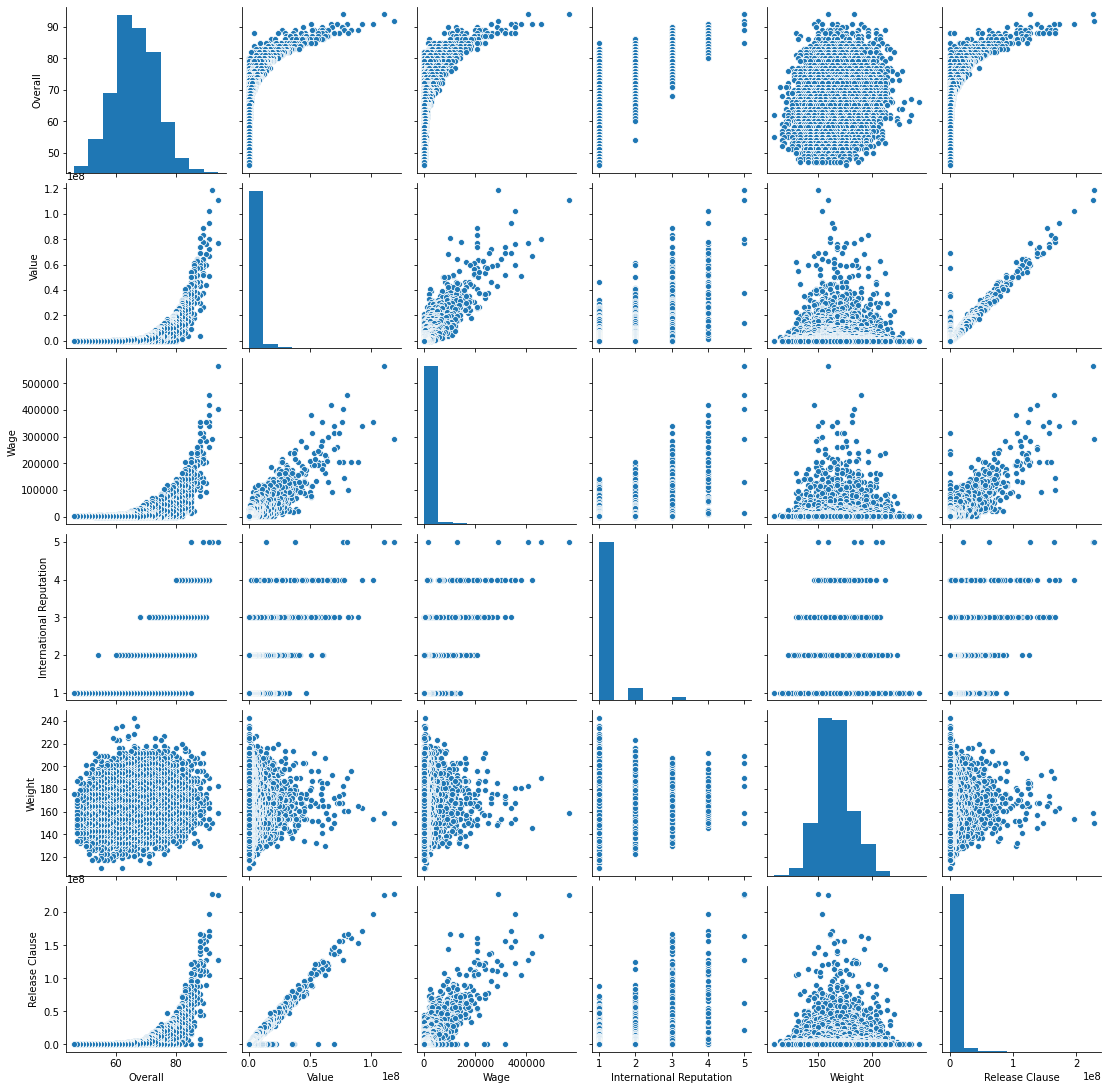

In [31]:
sns.pairplot(fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height','Weight','Release Clause']])

----

<table align="center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.  </b></i>
                </font>
            </div>
        </td>  
</table>

    a)What would the average wage for this set of players be?

    b)What is the average age?

    c)Is there a correlation between the Overall rating and Value for these players?

In [23]:
#Top 20 Players whose contract ends in 20 years
fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20][['Name','Overall','Value','Wage','Contract Valid Until','Age','Position']]

,Name,Overall,Value,Wage,Contract Valid Until,Age,Position
3,De Gea,91,72000000.0,260000.0,2020,27,GK
6,L. Modrić,91,67000000.0,420000.0,2020,32,RCM
8,Sergio Ramos,91,51000000.0,380000.0,2020,32,RCB
5,E. Hazard,91,93000000.0,340000.0,2020,27,LF
13,David Silva,90,60000000.0,285000.0,2020,32,LCM
21,E. Cavani,89,60000000.0,200000.0,2020,31,LS
24,G. Chiellini,89,27000000.0,215000.0,2020,33,LCB
31,C. Eriksen,88,73500000.0,205000.0,2020,26,CAM
39,Thiago Silva,88,24000000.0,165000.0,2020,33,RCB
50,D. Mertens,87,45000000.0,135000.0,2020,31,RF


In [24]:
# a) Average Wage of top 20 players
print('Mean Wage of players whose contract ends in 2020:')
fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20]['Wage'].mean()

Mean Wage of players whose contract ends in 2020:


205450.0

In [25]:
fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20][['Name','Overall','Value','Wage','Contract Valid Until','Age','Position']][fifa['Wage']<205450.0]

<ipython-input-25-5711a10a1d0c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20][['Name','Overall','Value','Wage','Contract Valid Until','Age','Position']][fifa['Wage']<205450.0]


,Name,Overall,Value,Wage,Contract Valid Until,Age,Position
21,E. Cavani,89,60000000.0,200000.0,2020,31,LS
31,C. Eriksen,88,73500000.0,205000.0,2020,26,CAM
39,Thiago Silva,88,24000000.0,165000.0,2020,33,RCB
50,D. Mertens,87,45000000.0,135000.0,2020,31,RF
52,M. Hamšík,87,46500000.0,125000.0,2020,30,LCM
46,K. Navas,87,30500000.0,195000.0,2020,31,GK
64,Alex Sandro,86,36500000.0,160000.0,2020,27,LB
71,T. Alderweireld,86,39000000.0,150000.0,2020,29,RCB
73,M. Benatia,86,30000000.0,160000.0,2020,31,CB
75,Fernandinho,86,18000000.0,185000.0,2020,33,CDM


In [26]:
# b) Average Age of top 20 players
print('Mean Age of players whose contract ends in 2020:')
fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20]['Age'].mean()

Mean Age of players whose contract ends in 2020:


30.65

In [27]:
#c) Correlation of Overall Rating and Wage of top 20 Players
fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20][['Overall','Wage']].corr()

,Overall,Wage
Overall,1.000000,0.868755
Wage,0.868755,1.000000


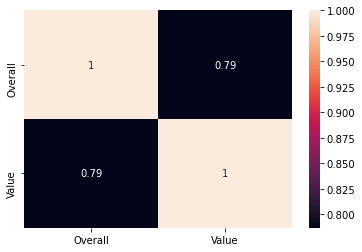

In [36]:
sns.heatmap(fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20][['Overall','Value']].corr(), annot=True)

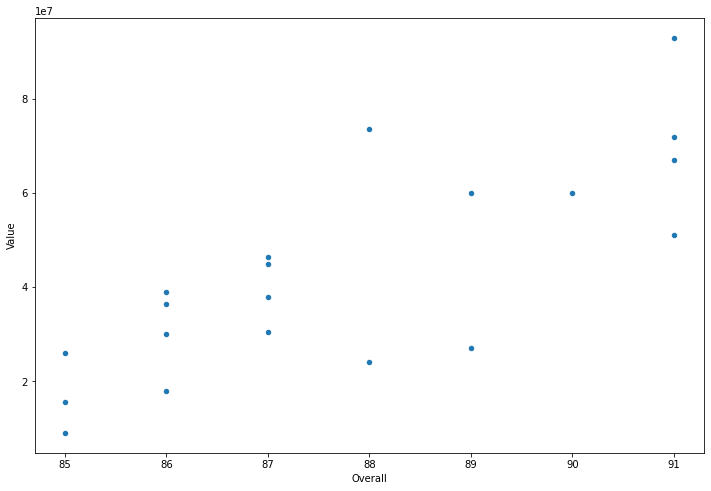

In [28]:
fifa[fifa['Contract Valid Until']=='2020'].sort_values(by='Overall',ascending=False)[0:20][['Overall','Value']].plot(kind='scatter',x='Overall',y='Value',figsize=(12,8))

----

<table align="center">
            <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <B> <i>4.	Generate tables containing the top 5 players by Overall rating for each unique position.  </b></i>
                </font>
            </div>
        </td>  
</table>
    
    a)	Are there any players appearing in more than one Table. Please point out such players.
    
    b)	What is the average wage one can expect to pay for the top 5 in every position?


In [37]:
df2 = pd.DataFrame()
for i in fifa['Position'].unique():
    df2[i]=fifa[fifa['Position']==i].sort_values(by='Overall',ascending=False)[0:5]['Name'].values

In [40]:
df2.iloc[:,0:9]

,RF,ST,LW,GK,RCM,LF,RS,RCB,LCM
0,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Suárez,Sergio Ramos,T. Kroos
1,D. Mertens,R. Lewandowski,Isco,J. Oblak,L. Modrić,P. Dybala,Z. Ibrahimović,Thiago Silva,David Silva
2,D. Valeri,H. Kane,Coutinho,M. ter Stegen,I. Rakitić,Iniesta,Falcao,Piqué,M. Hamšík
3,L. Podolski,S. Agüero,L. Insigne,T. Courtois,J. Kimmich,Jonathan Viera,W. Ben Yedder,R. Varane,M. Verratti
4,C. Ciano,G. Bale,L. Sané,M. Neuer,Saúl,S. Blanco,S. Zaza,L. Bonucci,Bruno Fernandes


In [42]:
df2.iloc[:,9:18]

,CB,LDM,CAM,CDM,LS,LCB,RM,LAM,LM
0,D. Godín,N. Kanté,A. Griezmann,Sergio Busquets,E. Cavani,G. Chiellini,K. Mbappé,J. Rodríguez,P. Aubameyang
1,S. Umtiti,Paulinho,C. Eriksen,Casemiro,G. Higuaín,M. Hummels,M. Salah,D. Tadić,Douglas Costa
2,M. Benatia,Marquinhos,Roberto Firmino,M. Pjanić,Diego Costa,K. Koulibaly,F. Thauvin,Fabrio Farinha,M. Reus
3,N. Otamendi,Lucas Leiva,T. Müller,Fernandinho,A. Gómez,J. Vertonghen,José Callejón,Leo Caldeirinha,S. Mané
4,Naldo,F. de Jong,M. Özil,Fabinho,Gerard Moreno,V. van Dijk,A. Di María,Nicolás Formido,Koke


In [43]:
df2.iloc[:,18:]

,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB
0,Marcelo,P. Pogba,Bernardo Silva,Thiago,Azpilicueta,J. Cuadrado,Luis Alberto,M. Ginter,N. Schulz
1,Jordi Alba,Illarramendi,R. Sterling,S. Milinković-Savić,K. Walker,H. Ziyech,S. Giovinco,S. Coleman,J. Hector
2,Alex Sandro,I. Gueye,Marco Asensio,Jorginho,Carvajal,Allan Bardinho,A. Milik,P. Kadeřábek,Granell
3,D. Alaba,D. De Rossi,A. Sánchez,I. Gündoğan,Sergi Roberto,Jacson Zonta,L. Stindl,D. Caligiuri,Jonny
4,Filipe Luís,M. Parolo,R. Mahrez,N. Keïta,L. Bender,Sebas Couteira,Raffael,Pablo Maffeo,J. Mojica


---

b)    What is the average wage one can expect to pay for the top 5 in every position?

Mean Salaries of top players in each position


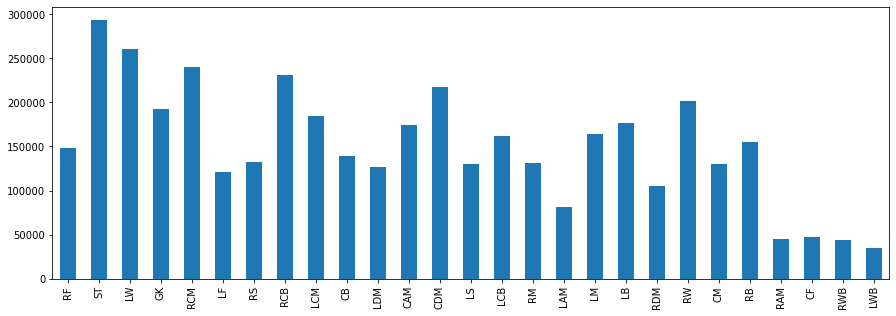

In [46]:
df3=pd.DataFrame()
for i in fifa['Position'].unique():
    df3[i]=fifa[fifa['Position']==i].sort_values(by='Overall',ascending=False)[0:5]['Wage'].values
df3.mean().plot(kind='bar',figsize=(15,5))
print('Mean Salaries of top players in each position')
plt.show()

In [50]:
df3.mean()

RF     148000.0
ST     294000.0
LW     261000.0
GK     192800.0
RCM    240800.0
LF     121200.0
RS     132200.0
RCB    231000.0
LCM    184400.0
CB     139600.0
LDM    126600.0
CAM    174000.0
CDM    217000.0
LS     130200.0
LCB    162000.0
RM     131400.0
LAM     81600.0
LM     164600.0
LB     177200.0
RDM    105000.0
RW     202000.0
CM     130600.0
RB     155400.0
RAM     45400.0
CF      47400.0
RWB     44200.0
LWB     34200.0
dtype: float64